# Reliability Diagram

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from os.path import join

from cal_methods import TemperatureScaling
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression

import sys
from os import path
sys.path.append( path.dirname( path.dirname( path.abspath("utility") ) ) )
from utility.unpickle_probs import unpickle_probs
from utility.evaluation import get_bin_info, softmax, compute_acc_bin

Using TensorFlow backend.


## Load in the data

In [2]:
PATH = '/Users/wildflowerlyi/Desktop/Github/NN_calibration/'
files = ('resnet_cifar/probs_resnet110_c10clip_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_2250mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_1125mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_560mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_2250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_1125_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_560_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2_2250mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2_1125mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2_560mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2_2250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2_1125_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol2_560_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3_2250mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3_1125mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3_560mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3_2250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3_1125_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol3_560_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4_2250mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4_1125mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4_560mean_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4_2250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4_1125_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_interpol4_560_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixupalpha1_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixupalpha06_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixupalpha04_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixupalpha01_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixupalpha005_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_varyprop_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_varyprop2250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_varyprop1125_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_varyprop560_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_2250mean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_1125mean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug_560mean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug3mean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug3_2250mean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug3_1125mean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_aug3_560mean_beta_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_45000_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_22500_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_11250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_5625_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_4500_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_2250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_1125_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_augmean_beta_largesample_560_logits.p'
         #,'resnet_cifar/probs_resnet110_c10clip_mixup_baseline_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_largesample_baseline_22500_logits.p'
         #,'resnet_cifar/probs_resnet110_c10clip_mixup_baseline_11250_logits.p'
         #,'resnet_cifar/probs_resnet110_c10clip_mixup_baseline_5625_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_baseline_4500_logits.p'
         #,'resnet_cifar/probs_resnet110_c10clip_mixup_baseline_2250_logits.p'
         ,'resnet_cifar/probs_resnet110_c10clip_mixup_baseline_1125_logits.p'
         #,'resnet_cifar/probs_resnet110_c10clip_mixup_baseline_560_logits.p'
        )

In [3]:
# reliability diagram plotting for subplot case.
def rel_diagram_sub(accs, confs, ax, M = 15, name = "Reliability Diagram", xname = "", yname=""):

    acc_conf = np.column_stack([accs,confs])
    acc_conf.sort(axis=1)
    outputs = acc_conf[:, 0]
    gap = acc_conf[:, 1]

    bin_size = 1./M
    positions = np.arange(0+bin_size/2, 1+bin_size/2, bin_size)

    # Plot gap first, so its below everything
    gap_plt = ax.bar(positions, gap, width = bin_size, edgecolor = "red", color = "red", alpha = 0.3, label="Gap", linewidth=2, zorder=2)

    #Bars with outputs
    output_plt = ax.bar(positions, outputs, width = bin_size, edgecolor = "black", color = "blue", label="Outputs", zorder = 3)

    # Line plot with center line.
    ax.set_aspect('equal')
    ax.plot([0,1], [0,1], linestyle = "--")
    ax.legend(handles = [gap_plt, output_plt])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_title(name, fontsize=24)
    ax.set_xlabel(xname, fontsize=22, color = "black")
    ax.set_ylabel(yname, fontsize=22, color = "black")

In [4]:
def get_pred_conf(y_probs, normalize = False):
    
    # Following Gulrajani et al (2016), avoid NaN values
    epsilon = 0.00000000000000000000000000000000000000001
    idx_nan = np.where(np.isnan(y_probs))
    y_probs[idx_nan] = epsilon
    
    y_preds = np.argmax(y_probs, axis=1)  # Take maximum confidence as prediction
    
    if normalize:
        y_confs = np.max(y_probs, axis=1)/np.sum(y_probs, axis=1)
    else:
        y_confs = np.max(y_probs, axis=1)  # Take only maximum confidence
        
    return y_preds, y_confs

In [5]:
def get_uncalibrated_res(path, filenum, M = 15):
    
    bin_size = 1./M

    FILE_PATH = join(path, filenum)
    (y_logits_val, y_val), (y_logits_test, y_test) = unpickle_probs(FILE_PATH)

    y_probs_test = softmax(y_logits_test)
    y_preds_test, y_confs_test = get_pred_conf(y_probs_test, normalize = False)
    
    return get_bin_info(y_confs_test, y_preds_test, y_test, bin_size = bin_size)


In [6]:
def cal_res(method, path, filenum, M = 15, name = "", approach = "single", m_kwargs = {}):
    
    bin_size = 1./M

    FILE_PATH = join(path, filenum)
    (y_logits_val, y_val), (y_logits_test, y_test) = unpickle_probs(FILE_PATH)

    y_probs_val = softmax(y_logits_val)  # Softmax logits
    y_probs_test = softmax(y_logits_test)
    
    # Following Gulrajani et al (2016), avoid NaN values
    epsilon = 0.00000000000000000000000000000000000000001
    
    idx_nan = np.where(np.isnan(y_probs_test))
    y_probs_test[idx_nan] = epsilon

    idx_nan = np.where(np.isnan(y_probs_val))
    y_probs_val[idx_nan] = epsilon
    
    if approach == "single":
        
        K = y_probs_test.shape[1]

        # Go through all the classes
        for k in range(K):
            # Prep class labels (1 fixed true class, 0 other classes)
            y_cal = np.array(y_val == k, dtype="int")[:, 0]

            # Train model
            model = method(**m_kwargs)
            model.fit(y_probs_val[:, k], y_cal) # Get only one column with probs for given class "k"

            y_probs_val[:, k] = model.predict(y_probs_val[:, k])  # Predict new values based on the fitting
            y_probs_test[:, k] = model.predict(y_probs_test[:, k])
            
            y_preds_val, y_confs_val = get_pred_conf(y_probs_val, normalize = True)
            y_preds_test, y_confs_test = get_pred_conf(y_probs_test, normalize = True)
    
    else:
        model = method(**m_kwargs)
        model.fit(y_logits_val, y_val)

        y_probs_val = model.predict(y_logits_val) 
        y_probs_test = model.predict(y_logits_test)

        y_preds_val, y_confs_val = get_pred_conf(y_probs_val, normalize = False)
        y_preds_test, y_confs_test = get_pred_conf(y_probs_test, normalize = False)
    

    accs_val, confs_val, len_bins_val = get_bin_info(y_confs_val, y_preds_val, y_val, bin_size = bin_size)
    accs_test, confs_test, len_bins_test = get_bin_info(y_confs_test, y_preds_test, y_test, bin_size = bin_size)
    
    return (accs_test, confs_test, len_bins_test), (accs_val, confs_val, len_bins_val)
    

In [12]:
import pickle

def gen_plots(files, plot_names =  [], M = 15):

    for i, filenum in enumerate(files):
        
        bin_info_uncal = get_uncalibrated_res(PATH, filenum, M)
        
        accs_confs = []
        accs_confs.append(cal_res(TemperatureScaling, PATH, filenum, M, "", "multi"))
        accs_confs.append(cal_res(IsotonicRegression, PATH, filenum, M, "", "single", {'y_min':0, 'y_max':1}))
        
        with open(plot_names[i] + "_bin_info.p", "wb") as f:
            pickle.dump(accs_confs, f)

        plt.style.use('ggplot')
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22.5, 4), sharex='col', sharey='row')
        names = [" ", " with Temperature Scaling"]
        
        # Uncalibrated information
        rel_diagram_sub(bin_info_uncal[0], bin_info_uncal[1], ax[0], M = M, name = "\n".join(plot_names[i].split()) + names[0], xname="Confidence")

        # Calibrated 
        for j in range(1):
            rel_diagram_sub(accs_confs[j][0][0], accs_confs[j][0][1], ax[j+1] , M = M, name = "\n".join(plot_names[i].split()) + names[j+1], xname="Confidence")

        ax[0].set_ylabel("Accuracy", color = "black")
        
        for ax_temp in ax:    
            plt.setp(ax_temp.get_xticklabels(), rotation='horizontal', fontsize=18)
            plt.setp(ax_temp.get_yticklabels(), fontsize=18)

        plt.savefig("_".join(plot_names[i].split()) + ".pdf", format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.2)
        plt.show()

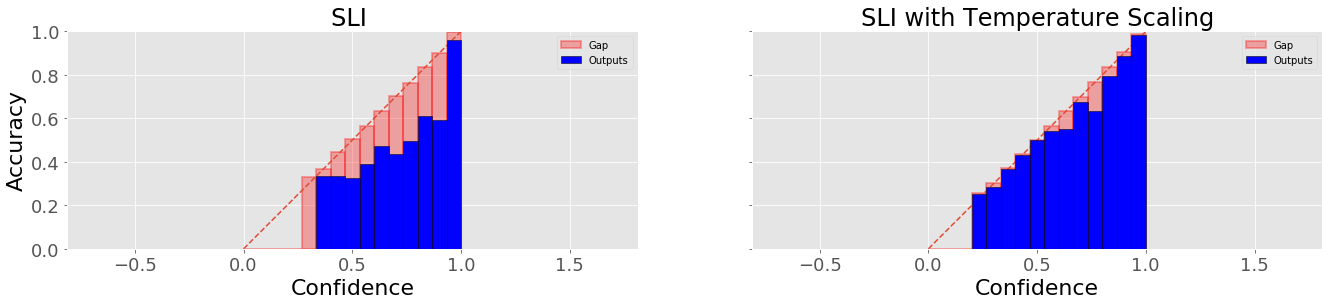

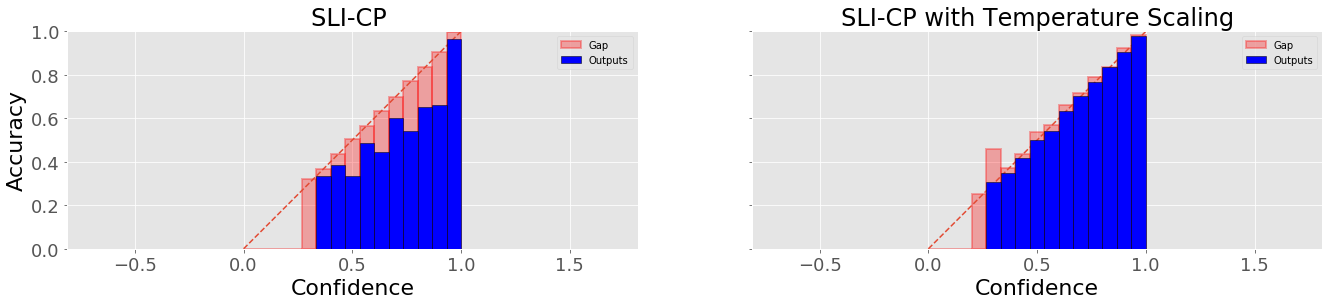

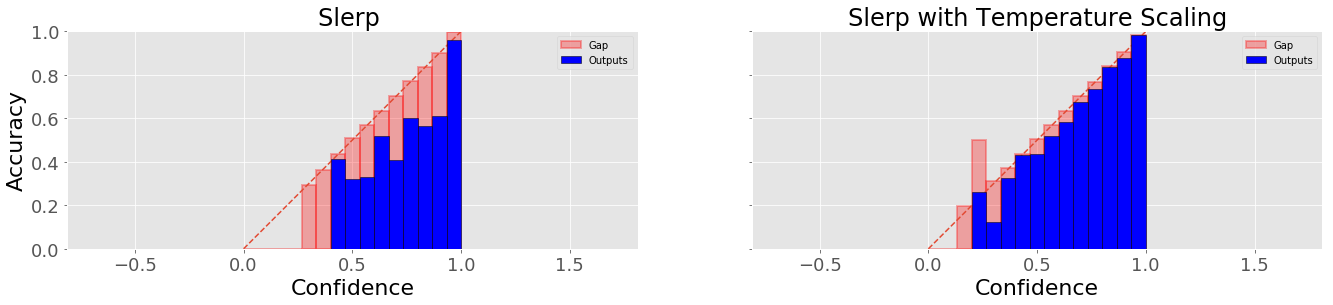

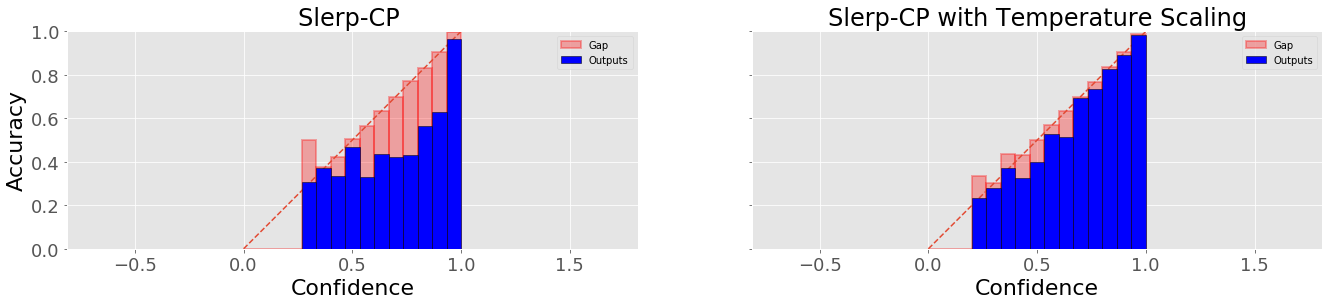

IndexError: list index out of range

In [17]:
gen_plots(files, plot_names = [#"Baseline ResNet-110"
                               "SLI"#,"Mean Codes Aug 1 4500"
                              #, "Mean Codes Aug 1 2250"
                              #, "Mean Codes Aug 1 1125"
                              #, "Mean Codes Aug 1 560"
                              #, "Sampled Codes Aug 1 4500"
                              #, "Sampled Codes Aug 1 2250"
                              #, "Sampled Codes Aug 1 1125"
                              #, "Sampled Codes Aug 1 560"
                              , "SLI-CP" #"Mean Codes Aug 2 4500"
                              #, "Mean Codes Aug 2 2250"
                              #, "Mean Codes Aug 2 1125"
                              #, "Mean Codes Aug 2 560"
                              #, "Sampled Codes Aug 2 4500"
                              #, "Sampled Codes Aug 2 2250"
                              #, "Sampled Codes Aug 2 1125"
                              #, "Sampled Codes Aug 2 560"
                              , "Slerp"#"Mean Codes Aug 3 4500"
                              #, "Mean Codes Aug 3 2250"
                              #, "Mean Codes Aug 3 1125"
                              #, "Mean Codes Aug 3 560"
                              #, "Sampled Codes Aug 3 4500"
                              #, "Sampled Codes Aug 3 2250"
                              #, "Sampled Codes Aug 3 1125"
                              #, "Sampled Codes Aug 3 560"
                              , "Slerp-CP"#"Mean Codes Aug 4 4500"
                              #, "Mean Codes Aug 4 2250"
                              #, "Mean Codes Aug 4 1125"
                              #, "Mean Codes Aug 4 560"
                              #, "Sampled Codes Aug 4 4500"
                              #, "Sampled Codes Aug 4 2250"
                              #, "Sampled Codes Aug 4 1125"
                              #, "Sampled Codes Aug 4 560"
                              #, "Mixup Alpha 1"
                              #, "Mixup Alpha 0.6"
                              #, "Mixup Alpha 0.4"
                              #, "Best-Performing ResNet-110" # Mixup alpha 0.2
                              #, "Mixup Alpha 0.1"
                              #, "Mixup Alpha 0.05"
                              #, "Mean Codes Aug 1 Beta 4500"
                              #, "Mean Codes Aug 1 Beta 2250"
                              #, "Mean Codes Aug 1 Beta 1125"
                              #, "Mean Codes Aug 1 Beta 560"
                              #, "Mean Codes Aug 3 Beta 4500"
                              #, "Mean Codes Aug 3 Beta 2250"
                              #, "Mean Codes Aug 3 Beta 1125"
                              #, "Mean Codes Aug 3 Beta 560"
                              #, "Mean Codes Aug 1 Beta Largesample 45000"
                              #, "Mean Codes Aug 1 Beta Largesample 22500"
                              #, "Mean Codes Aug 1 Beta Largesample 11250"
                              #, "Mean Codes Aug 1 Beta Largesample 5625"
                              #, "Mean Codes Aug 1 Beta Largesample 4500"
                              #, "Mean Codes Aug 1 Beta Largesample 2250"
                              #, "Mean Codes Aug 1 Beta Largesample 1125"
                              #, "Mean Codes Aug 1 Beta Largesample 560"
                              #, "Mixup Beta Largesample 22500"
                              #, "Mixup Beta Largesample 11250"
                              #, "Mixup Beta Largesample 4500"
                              ], M=15)